In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   user_id                            location   age
0        8            timmins, ontario, canada   NaN
1    11400             ottawa, ontario, canada  49.0
2    11676                       n/a, n/a, n/a   NaN
3    67544            toronto, ontario, canada  30.0
4    85526  victoria, british columbia, canada  36.0

Missing values in location column: 0


C:\Users\jimin\AppData\Local\Temp\ipykernel_3272\1817499993.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.values, y=country_counts.index, palette='viridis')


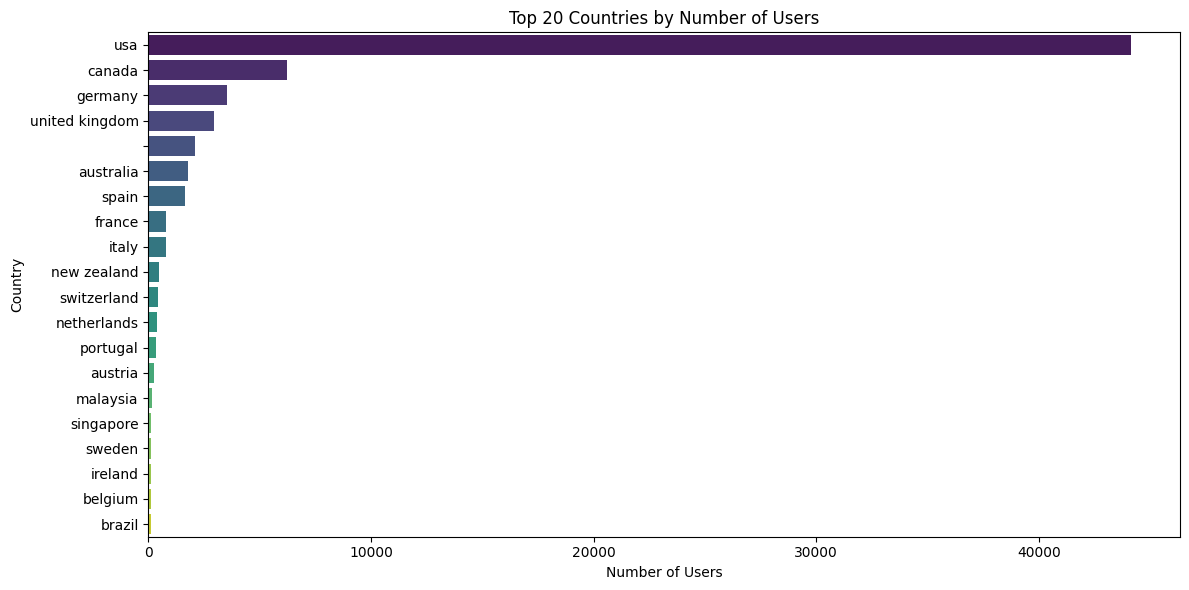

In [ ]:
# Read the users.csv file
users_df = pd.read_csv('../data/users.csv')

# Display the first few rows to understand the data
print(users_df.head())

# Check for missing values in the location column
print("\nMissing values in location column:", users_df['location'].isnull().sum())

# Extract country from location (assuming format is city, state, country)
users_df['country'] = users_df['location'].str.split(',').str[-1].str.strip()

# Count the number of users per country
country_counts = users_df['country'].value_counts().head(20)  # Top 20 countries

# Plot the distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=country_counts.values, y=country_counts.index, palette='viridis')
plt.title('Top 20 Countries by Number of Users')
plt.xlabel('Number of Users')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

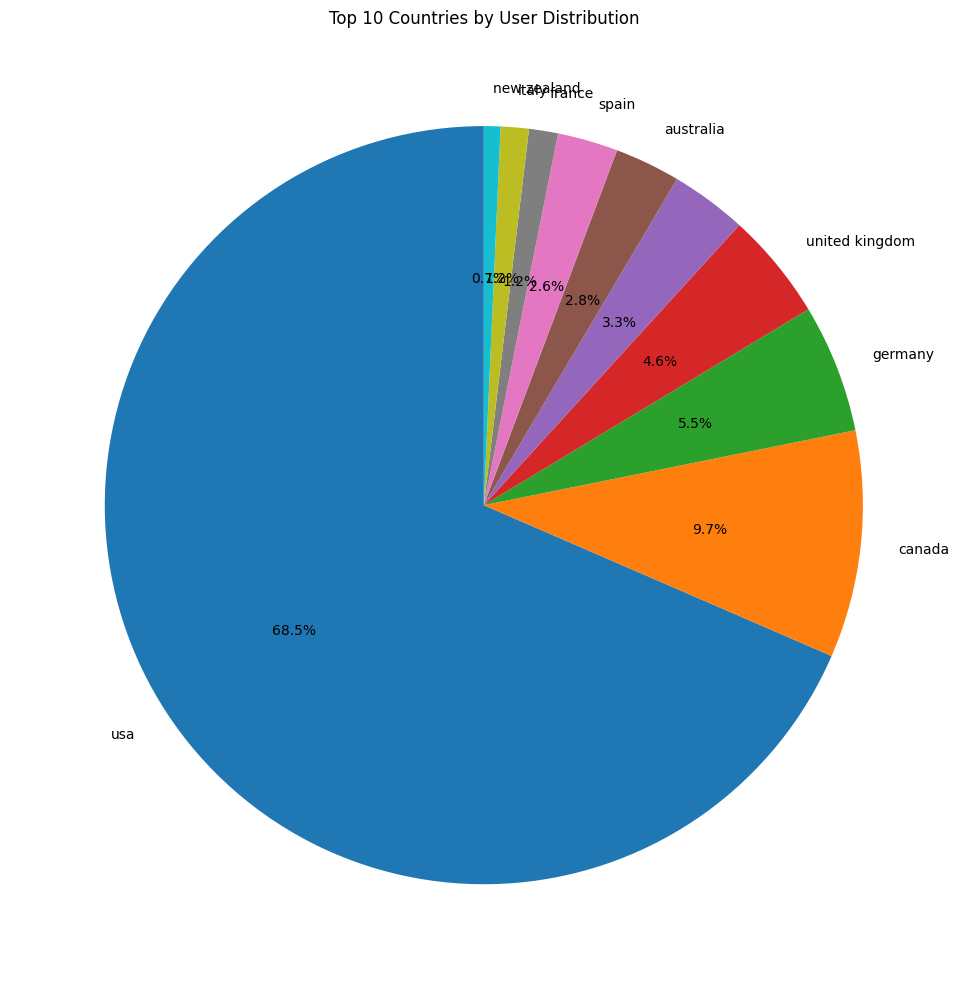

In [2]:
# For better visualization, let's also create a pie chart for the top 10 countries
plt.figure(figsize=(10, 10))
country_counts.head(10).plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Top 10 Countries by User Distribution')
plt.ylabel('')  # Hide the y-label
plt.tight_layout()
plt.show()

In [5]:
train_df = pd.read_csv('/data/ephemeral/home/data/train_ratings.csv')
test_df = pd.read_csv('/data/ephemeral/home/data/test_ratings.csv')
sub = pd.read_csv('/data/ephemeral/home/data/sample_submission.csv')

all_df = pd.concat([train_df, test_df], axis=0)

sparse_cols = ['user_id', 'isbn']

# 라벨 인코딩하고 인덱스 정보를 저장
label2idx, idx2label = {}, {}
for col in sparse_cols:
    all_df[col] = all_df[col].fillna('unknown')
    unique_labels = all_df[col].astype("category").cat.categories
    label2idx[col] = {label:idx for idx, label in enumerate(unique_labels)}
    idx2label[col] = {idx:label for idx, label in enumerate(unique_labels)}
    train_df[col] = train_df[col].fillna('unknown').map(label2idx[col])
    test_df[col] = test_df[col].fillna('unknown').map(label2idx[col])

print(train_df.shape)

(306795, 3)


In [6]:
print(train_df.duplicated(subset=['user_id', 'isbn']).sum())

0
